# Exploratory Data Analysis

In [ ]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
data = pd.read_csv("/content/data_clean.csv",index_col=0)#No index column will be displayed

In [ ]:
data.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S


In [ ]:
data

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,67,5,1,2010,67,C
155,30.0,193.0,6.9,70,9,26,2010,70,PS
156,NaN,145.0,13.2,77,9,27,2010,77,S
157,14.0,191.0,14.3,75,9,28,2010,75,S


In [ ]:
data.tail(10)

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
149,30.0,193.0,6.9,70,9,26,2010,70,C
150,NaN,145.0,13.2,77,9,27,2010,77,PS
151,14.0,191.0,14.3,75,9,28,2010,75,S
152,18.0,131.0,8.0,76,9,29,2010,76,PS
153,20.0,223.0,11.5,68,9,30,2010,68,S
154,41.0,190.0,7.4,67,5,1,2010,67,C
155,30.0,193.0,6.9,70,9,26,2010,70,PS
156,NaN,145.0,13.2,77,9,27,2010,77,S
157,14.0,191.0,14.3,75,9,28,2010,75,S
158,18.0,131.0,8.0,76,9,29,2010,76,C


In [ ]:
#Data Structure 
print(type(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(158, 9)


In [ ]:
#data types
data.dtypes # check data types of all variables

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [ ]:
data.describe()

,Ozone,Solar.R,Wind,Day,Year,Temp
count,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


In [ ]:
data.info() # find missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 12.3+ KB


# Data type conversion

In [ ]:
data['Month']=pd.to_numeric(data['Month'],errors='coerce') #replace with  NA 
data['Temp C']=pd.to_numeric(data['Temp C'],errors='coerce')# coerce will introduce NA values for non numeric data in the columns
data['Weather']=data['Weather'].astype('category') #data['Wind']=data['Wind'].astype('int64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 11.4 KB


####More on data type conversions
[link text](https://stackoverflow.com/questions/15891038/change-column-type-in-pandas)

# Duplicates

In [ ]:
# data.loc[159]=[1,1,1,1,1,1,1,1,1,1]
# data.loc[160]=[1,1,1,1,1,1,1,1,1,1]

In [ ]:
data.duplicated() # if any 2 rows has same values

1      False
2      False
3      False
4      False
5      False
       ...  
154    False
155    False
156    False
157     True
158    False
Length: 158, dtype: bool

In [ ]:
#Count of duplicated rows
data[data.duplicated()].shape

(1, 9)

In [ ]:
data

In [ ]:
#Print the duplicated rows, Record 151 and 157 are duplicate rows
data[data.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
157,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [ ]:
data_cleaned1=data.drop_duplicates()

In [ ]:
data_cleaned1.shape 

(157, 9)

# Drop columns

In [ ]:
data

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
2,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
4,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
5,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,67.0,5.0,1,2010,67,C
155,30.0,193.0,6.9,70.0,9.0,26,2010,70,PS
156,NaN,145.0,13.2,77.0,9.0,27,2010,77,S
157,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [ ]:
data_cleaned2=data_cleaned1.drop('Temp C',axis=1)

In [ ]:
data_cleaned2

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5.0,1,2010,67,S
2,36.0,118.0,8.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,5.0,3,2010,74,PS
4,18.0,313.0,11.5,5.0,4,2010,62,S
5,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9.0,30,2010,68,S
154,41.0,190.0,7.4,5.0,1,2010,67,C
155,30.0,193.0,6.9,9.0,26,2010,70,PS
156,NaN,145.0,13.2,9.0,27,2010,77,S


# Rename the columns

In [ ]:
#rename the Solar column, Pass parameter in dictionary form
data_cleaned3 = data_cleaned2.rename({'Solar.R': 'Solar'}, axis=1)

In [ ]:
data_cleaned3

# Outlier Detection

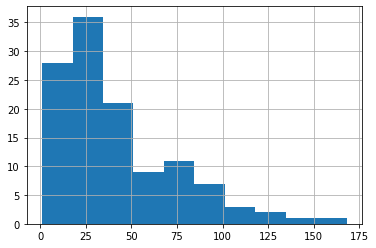

In [ ]:
# histogram of Ozone
data_cleaned3['Ozone'].hist()

In [ ]:
#Box plot
data_box=data_cleaned3.dropna()# data set is: data_box
data1_box=data_box.Ozone #in data1_box we are saving ozone column
plt.boxplot(data1_box)
plt.show()

In [ ]:
# Extracting outliers
box=plt.boxplot(data1_box)

In [ ]:
box

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6b7200ad30>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6b71f94ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6b7200a520>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6b71ffea30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6b71ffe0d0>],
 'means': []}

In [ ]:
[item.get_ydata() for item in box['fliers']] #fliers are outliers

[array([135., 168.])]

In [ ]:
#Extracting outliers
box=plt.boxplot(data['Ozone'].dropna())

In [ ]:
#Descriptive stat
data_cleaned3['Ozone'].describe()

count    119.000000
mean      41.815126
std       32.659249
min        1.000000
25%       18.000000
50%       31.000000
75%       62.000000
max      168.000000
Name: Ozone, dtype: float64

In [ ]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5.0,1,2010,67,S
2,36.0,118.0,8.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,5.0,3,2010,74,PS
4,18.0,313.0,11.5,5.0,4,2010,62,S
5,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9.0,30,2010,68,S
154,41.0,190.0,7.4,5.0,1,2010,67,C
155,30.0,193.0,6.9,9.0,26,2010,70,PS
156,NaN,145.0,13.2,9.0,27,2010,77,S


In [ ]:
#Bar plot - to identify outliers in categorical data - get count of unique values
data['Weather'].value_counts()

S     59
C     49
PS    47
Name: Weather, dtype: int64

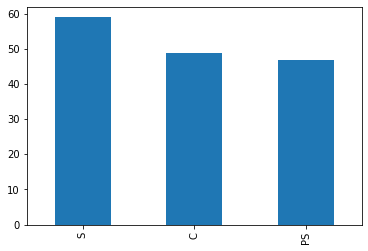

In [ ]:
#Bar plot - to identify outliers in categorical data
data['Weather'].value_counts().plot.bar()

# Missing Values and Imputation

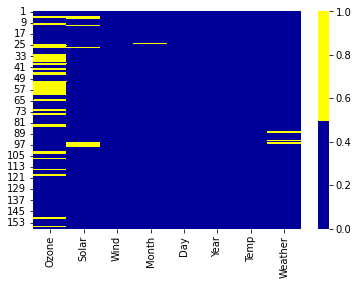

In [ ]:
import seaborn as sns # in seaborn documentation color codes are mentioned
cols = data_cleaned3.columns # save column names in cols dataset
# colours = ['blue','yellow'] # specify the colours - yellow is missing. blue is not missing.
colours=['#000099', '#ffff00']
sns.heatmap(data_cleaned3[cols].isnull(),
            cmap=sns.color_palette(colours)) # map colors T = Yellow, F = Blue

In [ ]:
cols

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Year', 'Temp', 'Weather'], dtype='object')

In [ ]:
data_cleaned3[data_cleaned3.isnull().any(axis=1)].head() # find cloumn wise null values

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
5,NaN,NaN,14.3,5.0,5,2010,56,S
6,28.0,NaN,14.9,5.0,6,2010,66,C
10,NaN,194.0,8.6,5.0,10,2010,69,S
11,7.0,NaN,6.9,5.0,11,2010,74,C
24,32.0,92.0,12.0,NaN,24,2010,61,C


In [ ]:
data_cleaned3.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [ ]:
data_cleaned3.info()

In [ ]:
#Mean Imputationa
mean = data_cleaned3['Ozone'].mean()
print(mean)

41.81512605042017


In [ ]:
data_cleaned3['Ozone'] = data_cleaned3['Ozone'].fillna(mean) # use mean of ozone col. to fill na values

In [ ]:
data_cleaned3.info()

In [ ]:
#Missing value imputation for categorical vlaue
#Get the object columns
obj_columns=data_cleaned3[['Weather']]

In [ ]:
obj_columns.isnull().sum()

In [ ]:
#Missing value imputation for categorical vlaue
obj_columns=obj_columns.fillna(obj_columns.mode().iloc[0])

In [ ]:
obj_columns

In [ ]:
obj_columns.isnull().sum()

Weather    0
dtype: int64

In [ ]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.000000,190.0,7.4,5.0,1,2010,67,S
2,36.000000,118.0,8.0,5.0,2,2010,72,C
3,12.000000,149.0,12.6,5.0,3,2010,74,PS
4,18.000000,313.0,11.5,5.0,4,2010,62,S
5,41.815126,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.000000,223.0,11.5,9.0,30,2010,68,S
154,41.000000,190.0,7.4,5.0,1,2010,67,C
155,30.000000,193.0,6.9,9.0,26,2010,70,PS
156,41.815126,145.0,13.2,9.0,27,2010,77,S


In [ ]:
obj_columns.shape

(157, 1)

In [ ]:
#data_cleaned4=data_cleaned3.drop(['Weather'],axis=1,inplace=True)

In [ ]:
#Join the data set with imputed object dataset
data_cleaned4=pd.concat([data_cleaned3,obj_columns],axis=1)

In [ ]:
data_cleaned4.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
Weather    0
dtype: int64

In [ ]:
data_cleaned4

# Scatter plot and Correlation analysis

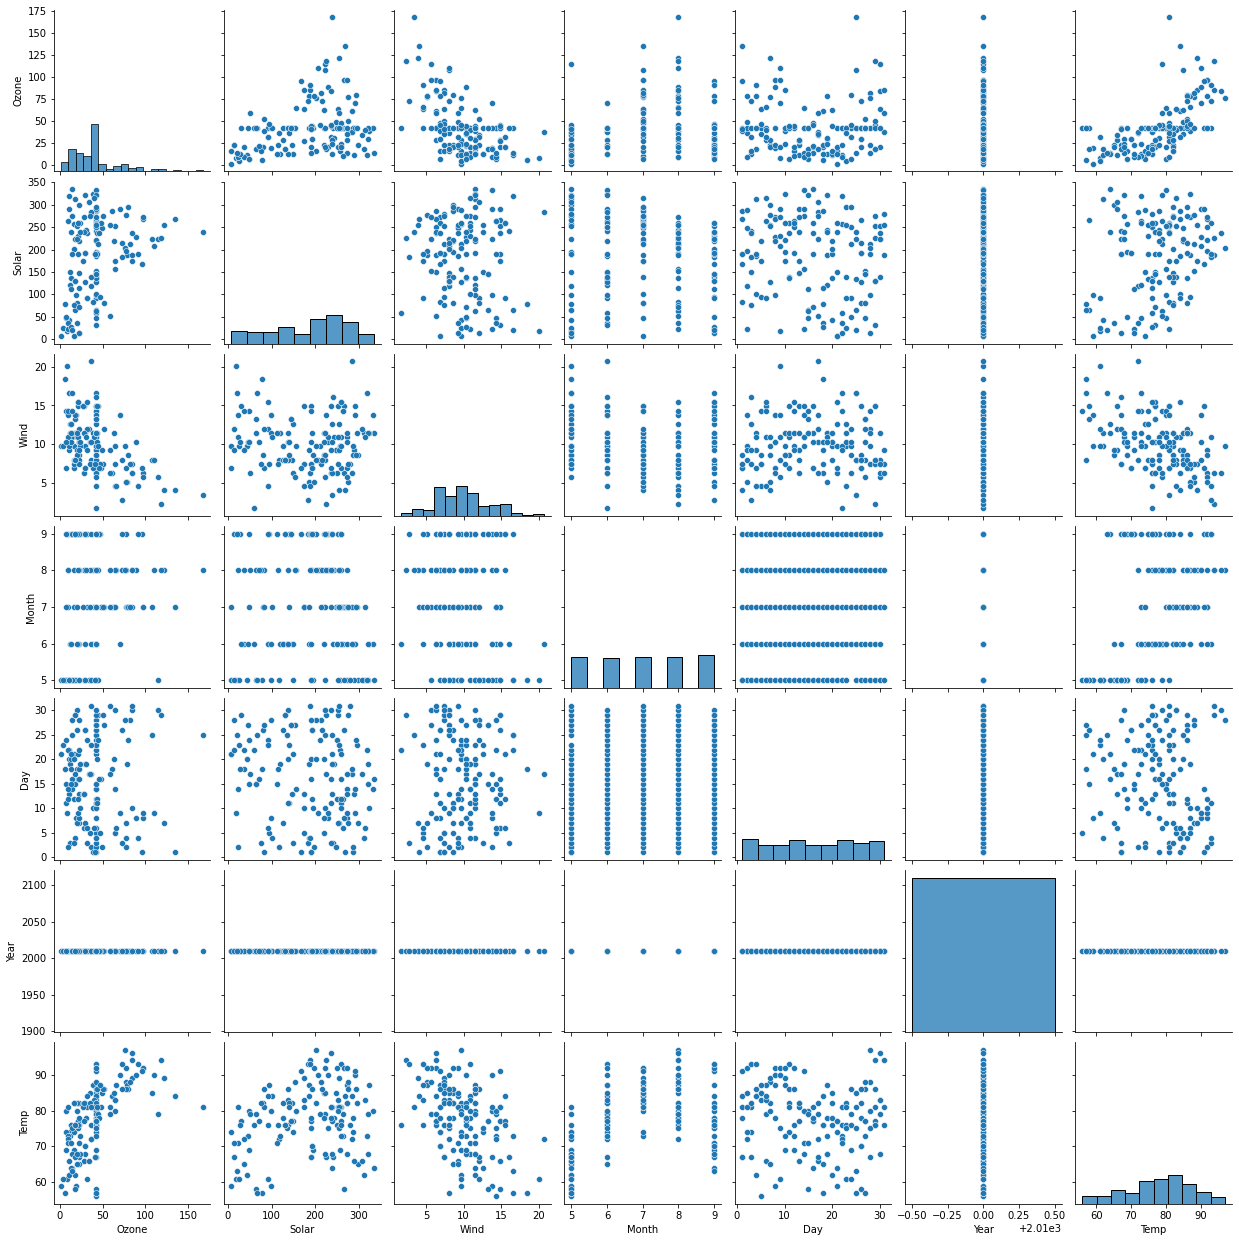

In [ ]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
#pd.plotting.scatter_matrix(data_cleaned3)
sns.pairplot(data_cleaned3) # diagonal - histogram, other - scatter plot

In [ ]:
#Correlation
data_cleaned3.corr() # corr. between same variables is always 1.

,Ozone,Solar,Wind,Month,Day,Year,Temp
Ozone,1.000000,0.308687,-0.520004,0.132860,-0.021916,NaN,0.606500
Solar,0.308687,1.000000,-0.057407,-0.094012,-0.155663,NaN,0.273558
Wind,-0.520004,-0.057407,1.000000,-0.166216,0.029900,NaN,-0.441228
Month,0.132860,-0.094012,-0.166216,1.000000,0.050055,NaN,0.398516
Day,-0.021916,-0.155663,0.029900,0.050055,1.000000,NaN,-0.122787
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.606500,0.273558,-0.441228,0.398516,-0.122787,NaN,1.000000


# Transformations

#### Dummy Variable

In [ ]:
data_cleaned4

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Weather
1,41.000000,190.0,7.4,5.0,1,2010,67,S,S
2,36.000000,118.0,8.0,5.0,2,2010,72,C,C
3,12.000000,149.0,12.6,5.0,3,2010,74,PS,PS
4,18.000000,313.0,11.5,5.0,4,2010,62,S,S
5,41.815126,NaN,14.3,5.0,5,2010,56,S,S
...,...,...,...,...,...,...,...,...,...
153,20.000000,223.0,11.5,9.0,30,2010,68,S,S
154,41.000000,190.0,7.4,5.0,1,2010,67,C,C
155,30.000000,193.0,6.9,9.0,26,2010,70,PS,PS
156,41.815126,145.0,13.2,9.0,27,2010,77,S,S


In [ ]:
#Creating dummy variable for Weather column
data_cleaned4=pd.get_dummies(data,columns=['Weather'])

In [ ]:
data_cleaned4

In [ ]:
data_cleaned4=data_cleaned4.dropna()

In [ ]:
data_cleaned4

#### Normalization of the data

In [ ]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data_cleaned4.values

In [ ]:
array = data_cleaned4.values

scaler = MinMaxScaler(feature_range=(0,1)) # desired range of transformed data 0 to 1
rescaledX = scaler.fit_transform(array)# apply normalization on array

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])


In [ ]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

In [ ]:
array = data_cleaned4.values
scaler = StandardScaler()
scaler.fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[-0.02  0.05 -0.71 -1.15 -1.53 -1.7   0.   -1.15 -0.64 -0.68  1.28]
 [-0.17 -0.75 -0.54 -0.62 -1.53 -1.59  0.   -0.62  1.57 -0.68 -0.78]
 [-0.9  -0.41  0.77 -0.4  -1.53 -1.48  0.   -0.4  -0.64  1.47 -0.78]
 [-0.72  1.43  0.45 -1.69 -1.53 -1.36  0.   -1.69 -0.64 -0.68  1.28]
 [-0.57  1.27 -0.37 -1.37 -1.53 -1.02  0.   -1.37 -0.64  1.47 -0.78]]


# Speed up the EDA process

In [ ]:
!pip install pandas-profiling==3.1.0
!pip install sweetviz 

In [ ]:
import pandas_profiling as pp
import sweetviz as sv
import joblib

In [ ]:
EDA_report= pp.ProfileReport(data,vars={"num":{"low_categorical_threshold":0}})

In [ ]:
EDA_report

In [ ]:
sweet_report = sv.analyze(data)
sweet_report.show_html('weather_report.html')